# **Q1. Problem Statement: Principal Component Analysis (PCA)**

Write a Python program that reads the dairy_product.csv(provided on LMS) file into  a  DataFrame, the  following  are  the  tasks  that  are  to  be  taken  into consideration while reducing the dimensions of data.

1.Load the mobile dairy_product.csvdata into a DataFrame

2.Find missing valuesand drop columns having more than 80% missing data

3.Do label encoding for categorical features

4.Extract   independent   variables   (Xs)   and dependent   variables   (Ys)   into separate data objects and drop unwanted columns like “ID”

5.Print low-variance data

6.Use random forestand print important features as per their value

 7.Based  on the high  correlation,drop  highly  correlated  columns,as  you  canfind.Dataset:


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


1.Load the mobile dairy_product.csvdata into a DataFrame

In [ ]:
df=pd.read_csv("/content/dairy_product.csv")
df

,ID,FoodGroup,ShortDescrip,Descrip,CommonName,MfgName,ScientificName,Energy_kcal,Protein_g,Fat_g,...,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,1001,Dairy and Egg Products,"BUTTER,WITH SALT","Butter, salted",NaN,NaN,NaN,717.0,0.85,81.11,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,1002,Dairy and Egg Products,"BUTTER,WHIPPED,WITH SALT","Butter, whipped, with salt",NaN,NaN,NaN,717.0,0.85,81.11,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,1003,Dairy and Egg Products,"BUTTER OIL,ANHYDROUS","Butter oil, anhydrous",NaN,NaN,NaN,876.0,0.28,99.48,...,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,1004,Dairy and Egg Products,"CHEESE,BLUE","Cheese, blue",NaN,NaN,NaN,353.0,21.40,28.74,...,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,1005,Dairy and Egg Products,"CHEESE,BRICK","Cheese, brick",NaN,NaN,NaN,371.0,23.24,29.68,...,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8613,83110,Finfish and Shellfish Products,"MACKEREL,SALTED","Fish, mackerel, salted",NaN,NaN,NaN,305.0,18.50,25.10,...,0.0375,0.206250,0.146154,0.016667,0.055000,0.000111,0.142857,0.362857,1.334545,0.100000
8614,90240,Finfish and Shellfish Products,"SCALLOP,(BAY&SEA),CKD,STMD","Mollusks, scallop, (bay and sea), cooked, steamed",NaN,NaN,NaN,111.0,20.54,0.84,...,0.0500,0.067250,0.018462,0.010000,0.008333,0.000037,0.088095,0.608571,0.394545,0.140909
8615,90480,Sweets,"SYRUP,CANE","Syrup, Cane",NaN,NaN,NaN,269.0,0.00,0.00,...,0.0000,0.006250,0.046154,0.108333,0.010833,0.000022,0.023810,0.011429,0.012727,0.017273
8616,90560,Finfish and Shellfish Products,"SNAIL,RAW","Mollusks, snail, raw",NaN,NaN,NaN,90.0,16.10,1.40,...,0.0150,0.087500,0.092308,0.008333,0.008333,0.000444,0.595238,0.388571,0.498182,0.090909


2.Find missing valuesand drop columns having more than 80% missing data

In [ ]:
df.isnull().sum()

ID                     0
FoodGroup              0
ShortDescrip           0
Descrip                0
CommonName          7555
MfgName             7058
ScientificName      7886
Energy_kcal            0
Protein_g              0
Fat_g                  0
Carb_g                 0
Sugar_g                0
Fiber_g                0
VitA_mcg               0
VitB6_mg               0
VitB12_mcg             0
VitC_mg                0
VitE_mg                0
Folate_mcg             0
Niacin_mg              0
Riboflavin_mg          0
Thiamin_mg             0
Calcium_mg             0
Copper_mcg             0
Iron_mg                0
Magnesium_mg           0
Manganese_mg           0
Phosphorus_mg          0
Selenium_mcg           0
Zinc_mg                0
VitA_USRDA             0
VitB6_USRDA            0
VitB12_USRDA           0
VitC_USRDA             0
VitE_USRDA             0
Folate_USRDA           0
Niacin_USRDA           0
Riboflavin_USRDA       0
Thiamin_USRDA          0
Calcium_USRDA          0


In [ ]:
df.isna().sum()/len(df)*100

ID                   0.000000
FoodGroup            0.000000
ShortDescrip         0.000000
Descrip              0.000000
CommonName          87.665352
MfgName             81.898352
ScientificName      91.506150
Energy_kcal          0.000000
Protein_g            0.000000
Fat_g                0.000000
Carb_g               0.000000
Sugar_g              0.000000
Fiber_g              0.000000
VitA_mcg             0.000000
VitB6_mg             0.000000
VitB12_mcg           0.000000
VitC_mg              0.000000
VitE_mg              0.000000
Folate_mcg           0.000000
Niacin_mg            0.000000
Riboflavin_mg        0.000000
Thiamin_mg           0.000000
Calcium_mg           0.000000
Copper_mcg           0.000000
Iron_mg              0.000000
Magnesium_mg         0.000000
Manganese_mg         0.000000
Phosphorus_mg        0.000000
Selenium_mcg         0.000000
Zinc_mg              0.000000
VitA_USRDA           0.000000
VitB6_USRDA          0.000000
VitB12_USRDA         0.000000
VitC_USRDA

In [ ]:
df=df.drop(['CommonName','ScientificName','MfgName'],axis=1)
df

,ID,FoodGroup,ShortDescrip,Descrip,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,...,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,1001,Dairy and Egg Products,"BUTTER,WITH SALT","Butter, salted",717.0,0.85,81.11,0.06,0.06,0.0,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,1002,Dairy and Egg Products,"BUTTER,WHIPPED,WITH SALT","Butter, whipped, with salt",717.0,0.85,81.11,0.06,0.06,0.0,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,1003,Dairy and Egg Products,"BUTTER OIL,ANHYDROUS","Butter oil, anhydrous",876.0,0.28,99.48,0.00,0.00,0.0,...,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,1004,Dairy and Egg Products,"CHEESE,BLUE","Cheese, blue",353.0,21.40,28.74,2.34,0.50,0.0,...,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,1005,Dairy and Egg Products,"CHEESE,BRICK","Cheese, brick",371.0,23.24,29.68,2.79,0.51,0.0,...,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8613,83110,Finfish and Shellfish Products,"MACKEREL,SALTED","Fish, mackerel, salted",305.0,18.50,25.10,0.00,0.00,0.0,...,0.0375,0.206250,0.146154,0.016667,0.055000,0.000111,0.142857,0.362857,1.334545,0.100000
8614,90240,Finfish and Shellfish Products,"SCALLOP,(BAY&SEA),CKD,STMD","Mollusks, scallop, (bay and sea), cooked, steamed",111.0,20.54,0.84,5.41,0.00,0.0,...,0.0500,0.067250,0.018462,0.010000,0.008333,0.000037,0.088095,0.608571,0.394545,0.140909
8615,90480,Sweets,"SYRUP,CANE","Syrup, Cane",269.0,0.00,0.00,73.14,73.20,0.0,...,0.0000,0.006250,0.046154,0.108333,0.010833,0.000022,0.023810,0.011429,0.012727,0.017273
8616,90560,Finfish and Shellfish Products,"SNAIL,RAW","Mollusks, snail, raw",90.0,16.10,1.40,2.00,0.00,0.0,...,0.0150,0.087500,0.092308,0.008333,0.008333,0.000444,0.595238,0.388571,0.498182,0.090909


In [ ]:
df.shape

(8618, 42)

3.Do label encoding for categorical features

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le=LabelEncoder()
df['FoodGroup']=le.fit_transform(df['FoodGroup'].values)

In [ ]:
df['ShortDescrip']=le.fit_transform(df['ShortDescrip'].values)

In [ ]:
df['Descrip']=le.fit_transform(df['Descrip'].values)

In [ ]:
df

,ID,FoodGroup,ShortDescrip,Descrip,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,...,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,1001,7,1842,1816,717.0,0.85,81.11,0.06,0.06,0.0,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,1002,7,1841,1817,717.0,0.85,81.11,0.06,0.06,0.0,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,1003,7,1837,1812,876.0,0.28,99.48,0.00,0.00,0.0,...,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,1004,7,2701,2665,353.0,21.40,28.74,2.34,0.50,0.0,...,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,1005,7,2702,2666,371.0,23.24,29.68,2.79,0.51,0.0,...,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8613,83110,10,5194,3811,305.0,18.50,25.10,0.00,0.00,0.0,...,0.0375,0.206250,0.146154,0.016667,0.055000,0.000111,0.142857,0.362857,1.334545,0.100000
8614,90240,10,7155,5512,111.0,20.54,0.84,5.41,0.00,0.0,...,0.0500,0.067250,0.018462,0.010000,0.008333,0.000037,0.088095,0.608571,0.394545,0.140909
8615,90480,23,7825,7906,269.0,0.00,0.00,73.14,73.20,0.0,...,0.0000,0.006250,0.046154,0.108333,0.010833,0.000022,0.023810,0.011429,0.012727,0.017273
8616,90560,10,7362,5516,90.0,16.10,1.40,2.00,0.00,0.0,...,0.0150,0.087500,0.092308,0.008333,0.008333,0.000444,0.595238,0.388571,0.498182,0.090909


4.Extract independent variables (Xs) and dependent variables (Ys) into separate data objects and drop unwanted columns like “ID”

In [ ]:
x=df.drop(['FoodGroup','ID'],axis=1)
x

,ShortDescrip,Descrip,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,...,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,1842,1816,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,1841,1817,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,1837,1812,876.0,0.28,99.48,0.00,0.00,0.0,840.0,0.001,...,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,2701,2665,353.0,21.40,28.74,2.34,0.50,0.0,198.0,0.166,...,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,2702,2666,371.0,23.24,29.68,2.79,0.51,0.0,292.0,0.065,...,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8613,5194,3811,305.0,18.50,25.10,0.00,0.00,0.0,47.0,0.410,...,0.0375,0.206250,0.146154,0.016667,0.055000,0.000111,0.142857,0.362857,1.334545,0.100000
8614,7155,5512,111.0,20.54,0.84,5.41,0.00,0.0,2.0,0.112,...,0.0500,0.067250,0.018462,0.010000,0.008333,0.000037,0.088095,0.608571,0.394545,0.140909
8615,7825,7906,269.0,0.00,0.00,73.14,73.20,0.0,0.0,0.000,...,0.0000,0.006250,0.046154,0.108333,0.010833,0.000022,0.023810,0.011429,0.012727,0.017273
8616,7362,5516,90.0,16.10,1.40,2.00,0.00,0.0,30.0,0.130,...,0.0150,0.087500,0.092308,0.008333,0.008333,0.000444,0.595238,0.388571,0.498182,0.090909


In [ ]:
y=df.FoodGroup
y

0        7
1        7
2        7
3        7
4        7
        ..
8613    10
8614    10
8615    23
8616    10
8617    10
Name: FoodGroup, Length: 8618, dtype: int64

5.Print low-variance data

In [ ]:
x.var()

ShortDescrip        6.185080e+06
Descrip             6.189878e+06
Energy_kcal         2.869260e+04
Protein_g           1.113149e+02
Fat_g               2.517411e+02
Carb_g              7.419631e+02
Sugar_g             1.850171e+02
Fiber_g             1.860775e+01
VitA_mcg            6.074054e+05
VitB6_mg            2.290714e-01
VitB12_mcg          1.865534e+01
VitC_mg             3.315774e+03
VitE_mg             1.481502e+01
Folate_mcg          3.480488e+04
Niacin_mg           2.337308e+01
Riboflavin_mg       2.023920e-01
Thiamin_mg          2.687065e-01
Calcium_mg          4.054732e+04
Copper_mcg          3.058670e-01
Iron_mg             3.279815e+01
Magnesium_mg        3.143672e+03
Manganese_mg        4.074828e+01
Phosphorus_mg       4.124686e+04
Selenium_mcg        8.004569e+02
Zinc_mg             1.127759e+01
VitA_USRDA          7.498833e-01
VitB6_USRDA         7.926347e-02
VitB12_USRDA        3.238774e+00
VitC_USRDA          4.093548e-01
VitE_USRDA          6.584452e-02
Folate_USR

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

6.Use random forestand print important features as per their value

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
rf.feature_importances_

array([0.07238249, 0.08005545, 0.04274578, 0.0425121 , 0.03984754,
       0.067459  , 0.02595573, 0.02332005, 0.01172774, 0.01661902,
       0.02430513, 0.02019006, 0.01093817, 0.01599982, 0.02418352,
       0.01380403, 0.0247182 , 0.01816505, 0.01457186, 0.0261853 ,
       0.02030893, 0.02302326, 0.01567623, 0.01904199, 0.025873  ,
       0.01146554, 0.01848014, 0.02325046, 0.02300524, 0.01110206,
       0.01662156, 0.02419218, 0.014313  , 0.02333228, 0.01877264,
       0.01463713, 0.01754949, 0.01638011, 0.01896324, 0.02832551])

In [ ]:
rf_feat = pd.Series(rf.feature_importances_, index= x_train.columns)
rf_feat

ShortDescrip        0.072382
Descrip             0.080055
Energy_kcal         0.042746
Protein_g           0.042512
Fat_g               0.039848
Carb_g              0.067459
Sugar_g             0.025956
Fiber_g             0.023320
VitA_mcg            0.011728
VitB6_mg            0.016619
VitB12_mcg          0.024305
VitC_mg             0.020190
VitE_mg             0.010938
Folate_mcg          0.016000
Niacin_mg           0.024184
Riboflavin_mg       0.013804
Thiamin_mg          0.024718
Calcium_mg          0.018165
Copper_mcg          0.014572
Iron_mg             0.026185
Magnesium_mg        0.020309
Manganese_mg        0.023023
Phosphorus_mg       0.015676
Selenium_mcg        0.019042
Zinc_mg             0.025873
VitA_USRDA          0.011466
VitB6_USRDA         0.018480
VitB12_USRDA        0.023250
VitC_USRDA          0.023005
VitE_USRDA          0.011102
Folate_USRDA        0.016622
Niacin_USRDA        0.024192
Riboflavin_USRDA    0.014313
Thiamin_USRDA       0.023332
Calcium_USRDA 

In [ ]:
x.shape

(8618, 40)

7.Based on the high correlation,drop highly correlated columns,as you canfind.Dataset:

In [ ]:
x_cor = x.corr()>0.8

In [ ]:
x_cor

,ShortDescrip,Descrip,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,...,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
ShortDescrip,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Descrip,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Energy_kcal,False,False,True,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Protein_g,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Fat_g,False,False,True,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Carb_g,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Sugar_g,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Fiber_g,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
VitA_mcg,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
VitB6_mg,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
x_cor['ShortDescrip']

ShortDescrip         True
Descrip              True
Energy_kcal         False
Protein_g           False
Fat_g               False
Carb_g              False
Sugar_g             False
Fiber_g             False
VitA_mcg            False
VitB6_mg            False
VitB12_mcg          False
VitC_mg             False
VitE_mg             False
Folate_mcg          False
Niacin_mg           False
Riboflavin_mg       False
Thiamin_mg          False
Calcium_mg          False
Copper_mcg          False
Iron_mg             False
Magnesium_mg        False
Manganese_mg        False
Phosphorus_mg       False
Selenium_mcg        False
Zinc_mg             False
VitA_USRDA          False
VitB6_USRDA         False
VitB12_USRDA        False
VitC_USRDA          False
VitE_USRDA          False
Folate_USRDA        False
Niacin_USRDA        False
Riboflavin_USRDA    False
Thiamin_USRDA       False
Calcium_USRDA       False
Copper_USRDA        False
Magnesium_USRDA     False
Phosphorus_USRDA    False
Selenium_USR

In [ ]:
df3=x.drop(['Descrip'],axis=1)
print("final shape of data frame is",df3.shape)

final shape of data frame is (8618, 39)


Q2. Problem Statement: Linear Discriminant Analysis

1.Use the above-separated data of X and Y

2.Standardizes the data

 3.Perform LDA

  4.Plot the graph of LDA for Test data using seaborn
  
   5.Build a Random forest model and evaluate your data

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

2.Standardizes the data

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)

3.Perform LDA

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [ ]:
lda=LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

4.Plot the graph of LDA for Test data using seaborn

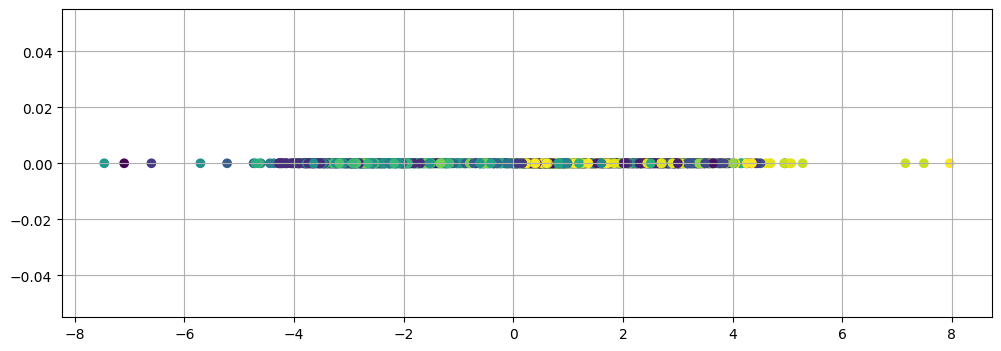

In [ ]:
plt.figure(figsize=(12,4))
plt.scatter(X_test,np.zeros(len(X_test)), c=y_test)
plt.grid()
plt.show()

5.Build a Random forest model and evaluate your data

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(random_state=1)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
print('Accuracy: ' + str(accuracy_score(y_test, y_pred)))

Accuracy: 0.2308584686774942
